In [1]:
%matplotlib inline
%env KERAS_BACKEND = tensorflow

import time
import locale
import random
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact
from sklearn.linear_model import LinearRegression
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import train_test_split

myfont = FontProperties(fname = r'c:\windows\fonts\simsun.ttc', size = 14)

env: KERAS_BACKEND=tensorflow


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
X = x_train[87]

In [6]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
X.shape

(28, 28)

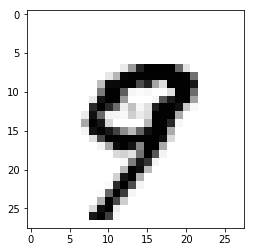

In [8]:
plt.imshow(X, cmap = 'Greys')

In [9]:
y_train[87]

9

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
x_train = x_train.reshape(60000, 784)

In [13]:
x_test = x_test.reshape(10000, 784)

In [14]:
from keras.utils import np_utils

In [15]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [16]:
y_train[87]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [18]:
model = Sequential()

In [19]:
model.add(Dense(4, input_dim = 784))
model.add(Activation('sigmoid'))

In [20]:
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [21]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [22]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.87), metrics = ['accuracy'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [24]:
784*4+4

3140

In [25]:
4*2+2

10

In [26]:
2*10+10

30

In [27]:
model_result = model.fit(x_train, y_train, batch_size = 100, epochs = 20, verbose = 1, validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0897 - acc: 0.1124 - val_loss: 0.0893 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0891 - acc: 0.1130 - val_loss: 0.0888 - val_acc: 0.1170
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0877 - acc: 0.1631 - val_loss: 0.0859 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0838 - acc: 0.1396 - val_loss: 0.0832 - val_acc: 0.1927
Epoch 5/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0812 - acc: 0.2440 - val_loss: 0.0803 - val_acc: 0.2850
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0797 - acc: 0.2228 - val_loss: 0.0788 - val_acc: 0.2079
Epoch 7/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0780 - acc: 0.2156 - val_loss: 0.0767 - val_acc

將資料先進行正規化處理

In [28]:
x_train_normalization = ( x_train - x_train.min() ) / ( x_train.max() - x_train.min() )
x_test_normalization = ( x_test - x_test.min() ) / ( x_test.max() - x_test.min() )

In [29]:
x_train_normalization.max()

1.0

In [30]:
from ipywidgets import interact_manual

In [31]:
predict = model.predict_classes(x_test)

In [32]:
predict

array([7, 3, 1, ..., 6, 3, 6], dtype=int64)

In [33]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap = 'Greys')
    print('神經網路判斷為:',predict[測試編號])

神經網路判斷為: 3


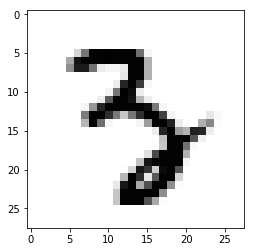

In [34]:
test(87)

In [35]:
interact_manual(test,測試編號 = (0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [36]:
score = model.evaluate(x_test_normalization,y_test)

10000/10000 [==============================] - 0s 18us/step


In [37]:
print('loss',score[0])
print('正確率',score[1])

loss 0.0679701542019844
正確率 0.3891



【Model #1 : 調整神經元數量 4:2:10　－＞ 30:20:10】


In [38]:
model_1 = Sequential()#[NCTS]DavidChi
model_1.add(Dense(30, input_dim = 784))
model_1.add(Activation('sigmoid'))
model_1.add(Dense(20))
model_1.add(Activation('sigmoid'))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))
model_1.summary()
model_1.compile(loss = "mse",optimizer = SGD(lr = 0.87),metrics = ["accuracy"])
model_1_result = model_1.fit(x_train_normalization, y_train, 
                             batch_size = 100, 
                             epochs = 20, 
                             verbose = 1, 
                             validation_data = (x_test_normalization,y_test))
score_1 = model_1.evaluate(x_test_normalization,y_test)
print('model_1 loss',score_1[0])
print('model_1 正確率',score_1[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                23550     
_________________________________________________________________
activation_4 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                620       
_________________________________________________________________
activation_5 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________
Train 

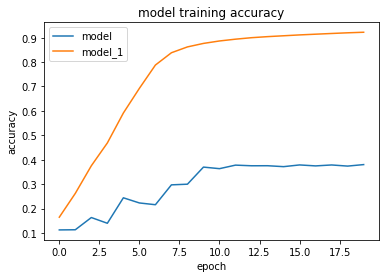

In [39]:
plt.plot(model_result.history['acc'])
plt.plot(model_1_result.history['acc'])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model','model_1'],loc = 'best')
plt.show()


【Model #2 : 增加層數 4:2:10　－＞ 30:20:20:10】


In [40]:
model_2 = Sequential()#[NCTS]DavidChi
model_2.add(Dense(30, input_dim = 784))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(20))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(20))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))
model_2.add(Activation('softmax'))
model_2.summary()
model_2.compile(loss = "mse",optimizer = SGD(lr = 0.87), metrics = ["accuracy"])
model_2_result = model_2.fit(x_train_normalization, y_train,
                             batch_size = 100,
                             epochs = 20,
                             verbose = 1,
                             validation_data = (x_test_normalization,y_test))
score_2 = model_2.evaluate(x_test_normalization,y_test)
print('model_2 loss',score_2[0])
print('model_2 正確率',score_2[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                23550     
_________________________________________________________________
activation_7 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                620       
_________________________________________________________________
activation_8 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                420       
_________________________________________________________________
activation_9 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
__________

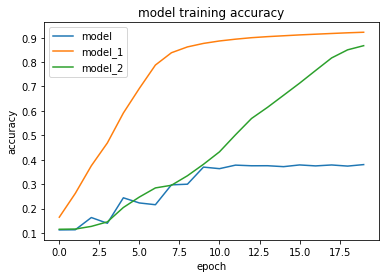

In [41]:
plt.plot(model_result.history['acc'])
plt.plot(model_1_result.history['acc'])
plt.plot(model_2_result.history['acc'])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model','model_1','model_2'],loc = 'best')
plt.show()


【Model #3 : 調整 Loss rate : 0.87 --> 0.087】


In [42]:
model_3 = Sequential()#[NCTS]DavidChi
model_3.add(Dense(30, input_dim = 784))
model_3.add(Activation('softplus'))
model_3.add(Dense(20))
model_3.add(Activation('softplus'))
model_3.add(Dense(20))
model_3.add(Activation('softplus'))
model_3.add(Dense(10))
model_3.add(Activation('softmax'))
model_3.summary()
model_3.compile(loss = "mse",optimizer = SGD(lr = 0.087), metrics = ["accuracy"]) 
model_3_result = model_3.fit(x_train_normalization, y_train,
                             batch_size = 100,
                             epochs = 20,
                             verbose = 1,
                             validation_data = (x_test_normalization,y_test))
score_3 = model_3.evaluate(x_test_normalization,y_test)
print('model_3 loss',score_3[0])
print('model_3 正確率',score_3[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 30)                23550     
_________________________________________________________________
activation_11 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 20)                620       
_________________________________________________________________
activation_12 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                420       
_________________________________________________________________
activation_13 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                210       
__________

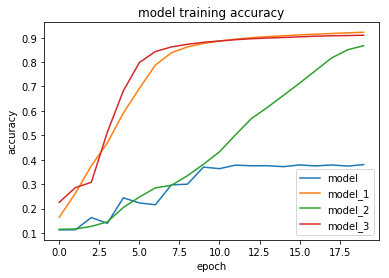

In [43]:
plt.plot(model_result.history['acc'])
plt.plot(model_1_result.history['acc'])
plt.plot(model_2_result.history['acc'])
plt.plot(model_3_result.history['acc'])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model','model_1','model_2','model_3'],loc = 'best')
plt.show()


【Model #4 : 調整 epochs 20 --> 100】


In [44]:
model_4 = Sequential()#[NCTS]DavidChi
model_4.add(Dense(30, input_dim = 784))
model_4.add(Activation('softplus'))
model_4.add(Dense(20))
model_4.add(Activation('softplus'))
model_4.add(Dense(20))
model_4.add(Activation('softplus'))
model_4.add(Dense(10))
model_4.add(Activation('softmax'))
model_4.summary()
model_4.compile(loss = "mse", optimizer = SGD(lr = 0.087), metrics = ["accuracy"]) 
model_4_result = model_4.fit(x_train_normalization, y_train,
                             batch_size = 100,
                             epochs = 100,
                             verbose = 1, 
                             validation_data = (x_test_normalization,y_test))
score_4 = model_4.evaluate(x_test_normalization,y_test)
print('model_4 loss',score_4[0])
print('model_4 正確率',score_4[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 30)                23550     
_________________________________________________________________
activation_15 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 20)                620       
_________________________________________________________________
activation_16 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 20)                420       
_________________________________________________________________
activation_17 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                210       
__________

60000/60000 [==============================] - 1s 23us/step - loss: 0.0102 - acc: 0.9353 - val_loss: 0.0104 - val_acc: 0.9346
Epoch 50/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0101 - acc: 0.9361 - val_loss: 0.0102 - val_acc: 0.9331
Epoch 51/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0100 - acc: 0.9361 - val_loss: 0.0102 - val_acc: 0.9344
Epoch 52/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0099 - acc: 0.9375 - val_loss: 0.0103 - val_acc: 0.9330
Epoch 53/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0098 - acc: 0.9383 - val_loss: 0.0100 - val_acc: 0.9362
Epoch 54/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0098 - acc: 0.9383 - val_loss: 0.0100 - val_acc: 0.9352
Epoch 55/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0097 - acc: 0.9389 - val_loss: 0.0099 - val_acc: 0.9367
Epoch 56/100
60000/60000 [==============

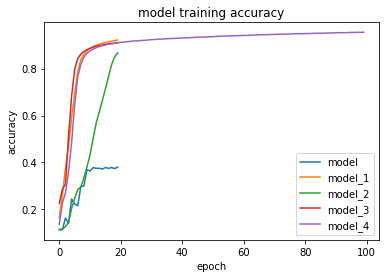

In [46]:
plt.plot(model_result.history['acc'])
plt.plot(model_1_result.history['acc'])
plt.plot(model_2_result.history['acc'])
plt.plot(model_3_result.history['acc'])
plt.plot(model_4_result.history['acc'])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model','model_1','model_2','model_3','model_4'],loc = 'best')
plt.show()

In [47]:
score = model.evaluate(x_test_normalization,y_test)
score_1 = model_1.evaluate(x_test_normalization,y_test)
score_2 = model_2.evaluate(x_test_normalization,y_test)
score_3 = model_3.evaluate(x_test_normalization,y_test)
score_4 = model_4.evaluate(x_test_normalization,y_test)
print('model   loss:',score[0],'model 正確率:',score[1])
print('model_1 loss:',score_1[0],'model_1 正確率:',score_1[1])
print('model_2 loss:',score_2[0],'model_2 正確率:',score_2[1])
print('model_3 loss:',score_3[0],'model_3 正確率:',score_3[1])
print('model_4 loss:',score_4[0],'model_4 正確率:',score_4[1])

10000/10000 [==============================] - 0s 26us/step
model   loss: 0.0679701542019844 model 正確率: 0.3891
model_1 loss: 0.011967273887526244 model_1 正確率: 0.9245
model_2 loss: 0.02228885837942362 model_2 正確率: 0.8751
model_3 loss: 0.013237543993326835 model_3 正確率: 0.9145
model_4 loss: 0.008080208052066155 model_4 正確率: 0.9478


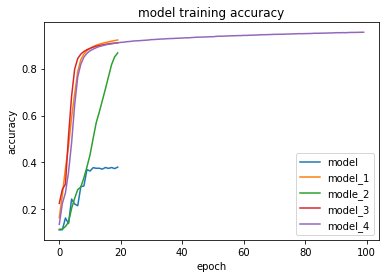

In [48]:
plt.plot(model_result.history['acc'])
plt.plot(model_1_result.history['acc'])
plt.plot(model_2_result.history['acc'])
plt.plot(model_3_result.history['acc'])
plt.plot(model_4_result.history['acc'])
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model','model_1','modle_2','model_3','model_4'],loc = 'best')
plt.show()

In [49]:
model_json = model.to_json()
open('[NCTS]_Homework_Q7-1_NeuronNetwork_DavidChi.json', 'w').write(model_json)
model.save_weights('[NCTS]_Homework_Q7-1_NeuronNetwork_DavidChi.h5')